<a href="https://colab.research.google.com/github/KruthiReddyKasarla/Kruthi_INFO5731_Spring-2025/blob/main/Kasarla_Kruthi_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [4]:
import re
import math
import pandas as pd
from collections import defaultdict

# Load the dataset
df = pd.read_csv("densho_narrators_cleaned.csv")

# tokenize text into words
def tokenize(text):
    return text.lower().split()

# count N-grams
def count_ngrams(text, n):
    words = tokenize(text)
    ngrams = [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]
    freq = defaultdict(int)
    for ng in ngrams:
        freq[ng] += 1
    return freq

# N-gram frequencies
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
unigram_freq = defaultdict(int)

docs = df["Cleaned_Transcript"].dropna().tolist()
for text in docs:
    bigram_counts = count_ngrams(text, 2)
    trigram_counts = count_ngrams(text, 3)
    words = tokenize(text)

    for word in words:
        unigram_freq[word] += 1
    for bg, count in bigram_counts.items():
        bigram_freq[bg] += count
    for tg, count in trigram_counts.items():
        trigram_freq[tg] += count

# bigram probabilities
bigram_probabilities = {}
for bigram, count in bigram_freq.items():
    w1 = bigram.split()[0]
    if unigram_freq[w1] > 0:
        bigram_probabilities[bigram] = count / unigram_freq[w1]

# Extract noun phrases using a heuristic
def extract_noun_phrases(text):
    return re.findall(r'\b(?:[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)\b', text)

noun_phrase_freq = defaultdict(int)
doc_noun_phrases = []
for text in docs:
    noun_phrases = extract_noun_phrases(text)
    doc_noun_phrases.append(noun_phrases)
    for np in noun_phrases:
        noun_phrase_freq[np] += 1

# Compute max frequency for normalization
max_np_freq = max(noun_phrase_freq.values(), default=1)

# Compute relative probabilities
relative_probabilities = []
for noun_phrases in doc_noun_phrases:
    rel_probs = {np: noun_phrase_freq[np] / max_np_freq for np in noun_phrases}
    relative_probabilities.append(rel_probs)

# Convert to structured table
df_noun_phrases = pd.DataFrame(relative_probabilities).fillna(0)

df_noun_phrases.to_csv("noun_phrase_analysis.csv", index=False)  # Save results

# Print some results
print("Top 5 Bigrams by Frequency:")
print(sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 Trigrams by Frequency:")
print(sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 Bigrams by Probability:")
print(sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nNoun Phrase Relative Probability Table:")
print(df_noun_phrases.head())


Top 5 Bigrams by Frequency:
[('john jack', 2), ('masako murakami', 2), ('richard murakami', 2), ('kay aiko', 1), ('aiko abe', 1)]

Top 5 Trigrams by Frequency:
[('kay aiko abe', 1), ('sharon tanagi aburano', 1), ('dougla l aihara', 1), ('nelson takeo akagi', 1), ('sumi suguro akizuki', 1)]

Top 5 Bigrams by Probability:
[('tanagi aburano', 1.0), ('dougla l', 1.0), ('nelson takeo', 1.0), ('takeo akagi', 1.0), ('sab akiyama', 1.0)]

Noun Phrase Relative Probability Table:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [5]:
import math
import pandas as pd
from collections import defaultdict

df = pd.read_csv("densho_narrators_cleaned.csv")

def tokenize(text):
    return text.lower().split()

# Compute TF
def compute_tf(doc):
    tf = defaultdict(int)
    words = tokenize(doc)
    total_words = len(words)
    for word in words:
        tf[word] += 1
    return {word: count / total_words for word, count in tf.items()}

# Compute IDF
def compute_idf(docs):
    idf = {}
    total_docs = len(docs)
    doc_count = defaultdict(int)

    for doc in docs:
        words = set(tokenize(doc))
        for word in words:
            doc_count[word] += 1

    for word, count in doc_count.items():
        idf[word] = math.log(total_docs / (1 + count))

    return idf

# Compute TF-IDF Matrix
docs = df["Cleaned_Transcript"].dropna().tolist()
tf_matrix = [compute_tf(doc) for doc in docs]
idf_values = compute_idf(docs)

tfidf_matrix = [{word: tf[word] * idf_values[word] for word in tf} for tf in tf_matrix]

# query and compute its TF-IDF vector
query = "An outstanding movie with a haunting performance and best character development"
query_tf = compute_tf(query)
query_tfidf = {word: query_tf[word] * idf_values.get(word, 0) for word in query_tf}

# cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(word, 0) * vec2.get(word, 0) for word in set(vec1.keys()).union(set(vec2.keys())))
    norm1 = math.sqrt(sum(value**2 for value in vec1.values()))
    norm2 = math.sqrt(sum(value**2 for value in vec2.values()))
    return dot_product / (norm1 * norm2) if norm1 and norm2 else 0

# Rank documents based on cosine similarity
doc_scores = [(i, cosine_similarity(tfidf_matrix[i], query_tfidf)) for i in range(len(docs))]
ranked_docs = sorted(doc_scores, key=lambda x: x[1], reverse=True)

# Display top 5 ranked documents
print("Top 5 ranked documents based on cosine similarity:")
for idx, score in ranked_docs[:5]:
    print(f"Document {idx}: Similarity Score = {score:.4f}")

# Output
output = [(idx, docs[idx][:100], score) for idx, score in ranked_docs[:5]]
df_output = pd.DataFrame(output, columns=["Document Index", "Document Snippet", "Similarity Score"])
print(df_output)


Top 5 ranked documents based on cosine similarity:
Document 0: Similarity Score = 0.0000
Document 1: Similarity Score = 0.0000
Document 2: Similarity Score = 0.0000
Document 3: Similarity Score = 0.0000
Document 4: Similarity Score = 0.0000
   Document Index       Document Snippet  Similarity Score
0               0           kay aiko abe                 0
1               1                art abe                 0
2               2  sharon tanagi aburano                 0
3               3        toshiko aiboshi                 0
4               4        dougla l aihara                 0


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

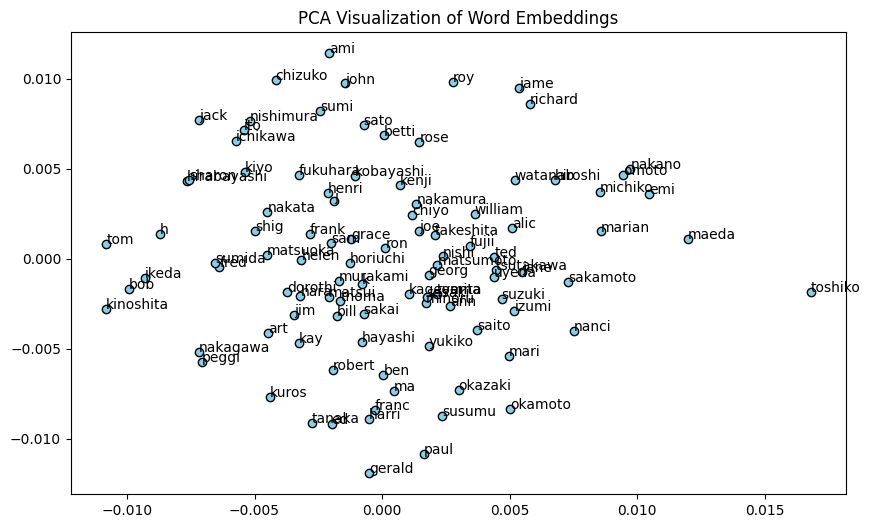

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


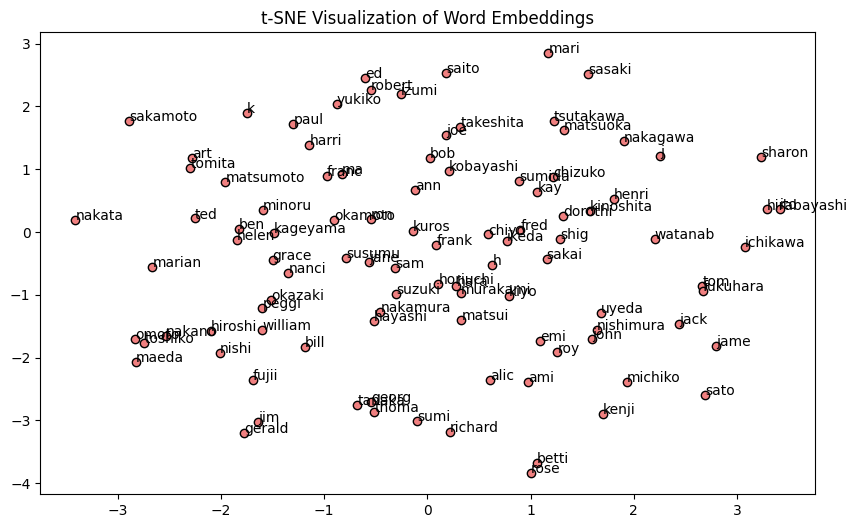

One of the words 'man' or 'woman' is not in vocabulary.
One of the words 'king' or 'queen' is not in vocabulary.
One of the words 'happy' or 'sad' is not in vocabulary.
One of the words 'teacher' or 'student' is not in vocabulary.


In [6]:
import math
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine

df = pd.read_csv("densho_narrators_cleaned.csv")

def tokenize(text):
    return text.lower().split()

# Prepare data for training Word2Vec
sentences = [tokenize(doc) for doc in df["Cleaned_Transcript"].dropna().tolist()]

# Train Word2Vec Model
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=300, window=5, min_count=2, workers=4)
word2vec_model.train(sentences, total_examples=len(sentences), epochs=10)

# Get word vectors
word_vectors = word2vec_model.wv

# Reduce dimensionality using PCA
words = list(word_vectors.index_to_key)[:100]  # Take first 100 words for visualization
word_vecs = np.array([word_vectors[word] for word in words])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vecs)

# Visualize with PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', c='skyblue')
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA Visualization of Word Embeddings")
plt.show()

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(word_vecs)

# Visualize with t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], edgecolors='k', c='lightcoral')
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

# Compute Cosine Similarity
def cosine_similarity(word1, word2):
    return 1 - cosine(word_vectors[word1], word_vectors[word2])

word_pairs = [("man", "woman"), ("king", "queen"), ("happy", "sad"), ("teacher", "student")]
for word1, word2 in word_pairs:
    if word1 in word_vectors and word2 in word_vectors:
        print(f"Cosine Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")
    else:
        print(f"One of the words '{word1}' or '{word2}' is not in vocabulary.")








## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# Link: https://github.com/KruthiReddyKasarla/Kruthi_INFO5731_Spring-2025/blob/main/densho_sentiment.csv


#Sentiment Analysis: The dataset now includes sentiment labels for deeper analysis.
#Text Classification: A labeled dataset is suitable for training any classification model.


#Labeling Schema:
#Positive: Represents hopeful or positive descriptions.
#Negative: indicates difficulties, work, struggle, or an unequal element.
#Neutral: Descriptions with no strong emotional connotations.



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The exercise was indeed a great challenge and a very good learning experience, particularly in terms of applying the whole package of NLP techniques from scratch. A lot of time was dedicated to computing TF-IDF manually and training word embeddings all on my own. I enjoyed visualizing the same and performing document similarity analysis. The time given was more than sufficient.